In [1]:
#Description:
#   Analysis of NATIONAL AND STATE FBI HOMICIDE CRIME DATA 
#
#Definitions:
#   
#  
#
#Modification History:
#   DD-MMM-YYY  Author          Description
#   17-07-2019  Stacey Smith    Adding Census/Economic data and Agency Analysis

In [2]:
# Dependencies and Setup

%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

In [4]:
#AGENCY ANALYSIS

agency_path = "output_data/final_agency_data.csv"
agency_df = pd.read_csv(agency_path, encoding="ISO-8859-1")





,Unnamed: 0,State,Total Agencies,Active Agencies,Pct Active
0,2,AL,423,1,0.236407
1,4,AR,310,294,94.838710
2,6,AZ,124,5,4.032258
3,9,CO,244,220,90.163934
4,11,CT,107,94,87.850467


In [5]:
#IMPORT CENSUS DATA

ses_census_path = "output_data/census_data.csv"
ses_census_df = pd.read_csv(ses_census_path, encoding="ISO-8859-1")

ses_census_df.head()

,Unnamed: 0,state_name,Emp_pop_all,Pct_Emp_pop_all,UnEmp_pop_all,Pct_UnEmp_pop_all,Emp_pop_Female,Pct_Emp_pop_Female,Total_median_income,Total_mean_income,Per_capita_income,Median_earnings,Median_male,Median_female,Pct_Pov_pop_all18,region_code,state_abbr,state_fips_code,state_id
0,0,Alabama,3876136,3876136,1642927,42.4,2022516,2022516,46472,64476,25746,29288,46602,35060,15.6,3,AL,1.0,2
1,1,Alaska,571453,571453,170831,29.9,271063,271063,76114,94469,35065,37369,58955,47160,8.9,4,AK,2.0,1
2,2,Arizona,5371341,5371341,2174225,40.5,2718818,2718818,53510,73735,27964,30811,46294,38810,14.7,4,AZ,4.0,5
3,3,Arkansas,2351061,2351061,984959,41.9,1209967,1209967,43813,61330,24426,27923,41576,32813,15.8,3,AR,5.0,3
4,4,California,30910058,30910058,11297281,36.5,15665864,15665864,67169,96104,33128,32738,52054,45568,13.4,4,CA,6.0,6


<IPython.core.display.Javascript object>


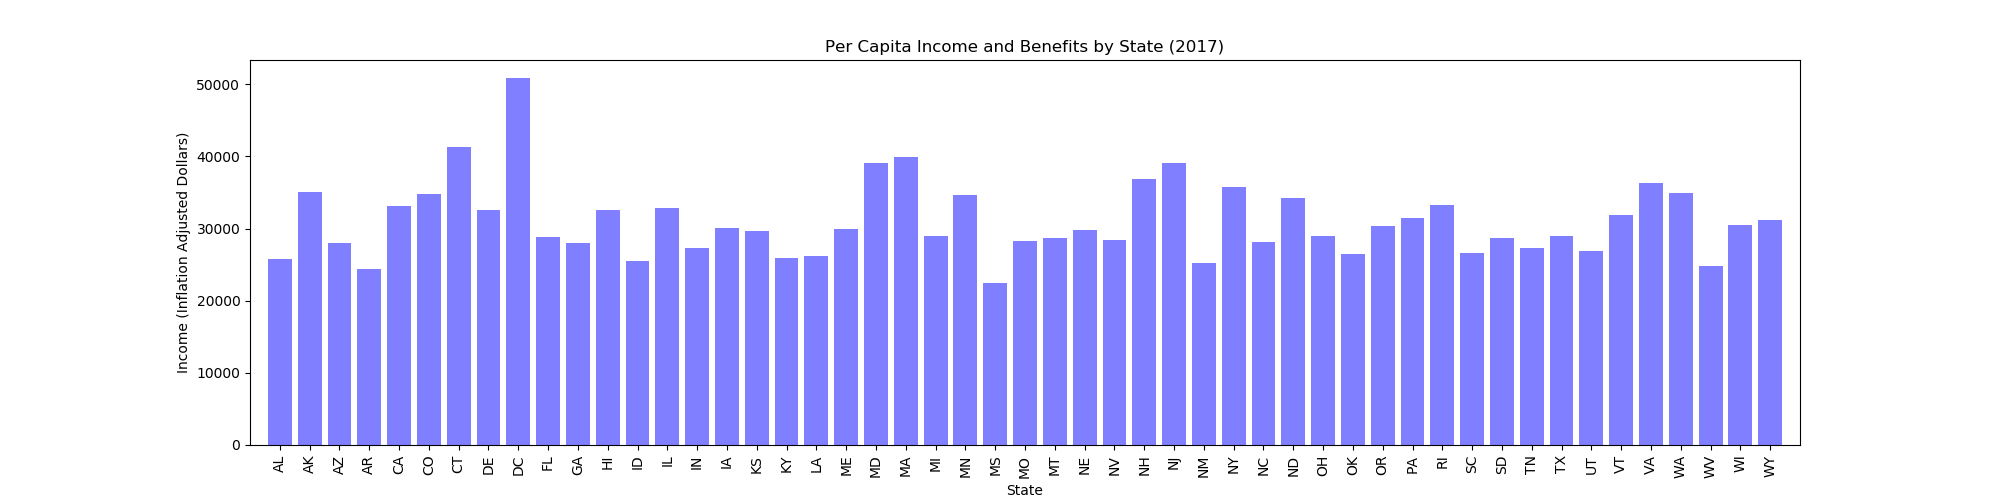

In [6]:
#PER CAPITA INCOME BY STATE FOR 2017 - - BASED ON 2017 CENSUS DATA ONLY 

states = ses_census_df['state_abbr']
per_capita = ses_census_df['Per_capita_income']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, per_capita, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Per Capita Income and Benefits by State (2017)")
plt.xlabel("State")
plt.ylabel("Income (Inflation Adjusted Dollars)")

plt.savefig("Images/State_PerCapita_Income_2017.png")

In [ ]:
#MEDIAN EARNINGS (MALE & FEMALE SIDE-BY-SIDE) BY STATE FOR 2017 - - BASED ON 2017 CENSUS DATA ONLY 

states = ses_census_df['state_abbr']
med_earn_F = ses_census_df['Median_female']
med_earn_M = ses_census_df['Median_male']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))




women = plt.bar(x_axis, med_earn_F, color='purple', alpha=0.5, align='center')
men = plt.bar(x_axis, med_earn_M, color='lightblue', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Median Earnings for Women and Men by State (2017)")
plt.xlabel("State")
plt.ylabel("Median Earnings (Inflation Adjusted Dollars)")

plt.legend((women[0], men[0]), ('Women', 'Men'))

plt.savefig("Images/Male_and_Female_State_Median_Earnings_2017.png")

In [ ]:
#PERCENTAGE OF 18+ POPULATION LIVING BELOW POVERTY LEVEL - BASED ON 2017 CENSUS DATA ONLY 
states = ses_census_df['state_abbr']
pop_pov = ses_census_df['Pct_Pov_pop_all18']
x_axis = np.arange(len(states))

plt.figure(figsize=(20, 5))
plt.bar(x_axis, pop_pov, color='purple', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="vertical")

plt.xlim(-1, len(x_axis))

plt.title("Percentage of 18+ Population Living Under Poverty Level")
plt.xlabel("State")
plt.ylabel("Percent")

plt.savefig("Images/Pct_Poverty_2017.png")